In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
df = pd.read_csv("C:/Users/savil/Downloads/aussie/weatherAUS.csv")

In [3]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [4]:
df.shape

(145460, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [8]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [9]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [10]:
min_temp = df['MinTemp'].min()
print(min_temp)

-8.5


In [11]:
max_temp = df['MaxTemp'].max()
print(max_temp)

48.1


In [12]:
df['Sunshine'].value_counts()

0.0     2359
10.7    1101
11.0    1094
10.8    1069
10.5    1027
        ... 
14.0      15
14.1       6
14.3       4
14.2       2
14.5       1
Name: Sunshine, Length: 145, dtype: int64

array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>,
        <AxesSubplot:title={'center':'Evaporation'}>],
       [<AxesSubplot:title={'center':'Sunshine'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>,
        <AxesSubplot:title={'center':'WindSpeed9am'}>,
        <AxesSubplot:title={'center':'WindSpeed3pm'}>],
       [<AxesSubplot:title={'center':'Humidity9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>,
        <AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'Pressure3pm'}>],
       [<AxesSubplot:title={'center':'Cloud9am'}>,
        <AxesSubplot:title={'center':'Cloud3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'}>,
        <AxesSubplot:title={'center':'Temp3pm'}>]], dtype=object)

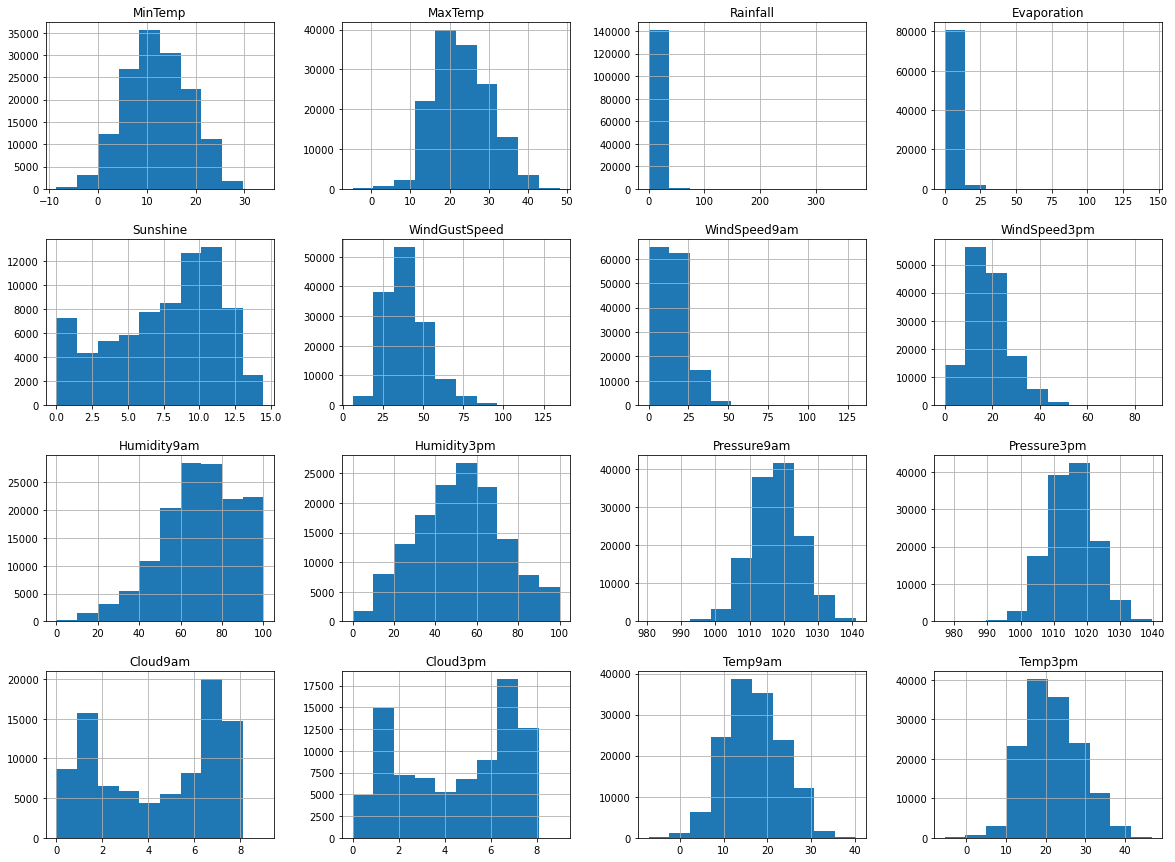

In [13]:
df.hist(figsize = (20,15))

In [14]:
print("Percentage of missing vlaues: ")
print((df.isnull().sum().sort_values(ascending = False) / len(df)) * 100)

Percentage of missing vlaues: 
Sunshine         48.009762
Evaporation      43.166506
Cloud3pm         40.807095
Cloud9am         38.421559
Pressure9am      10.356799
Pressure3pm      10.331363
WindDir9am        7.263853
WindGustDir       7.098859
WindGustSpeed     7.055548
Humidity3pm       3.098446
WindDir3pm        2.906641
Temp3pm           2.481094
RainTomorrow      2.245978
RainToday         2.241853
Rainfall          2.241853
WindSpeed3pm      2.105046
Humidity9am       1.824557
WindSpeed9am      1.214767
Temp9am           1.214767
MinTemp           1.020899
MaxTemp           0.866905
Location          0.000000
Date              0.000000
dtype: float64


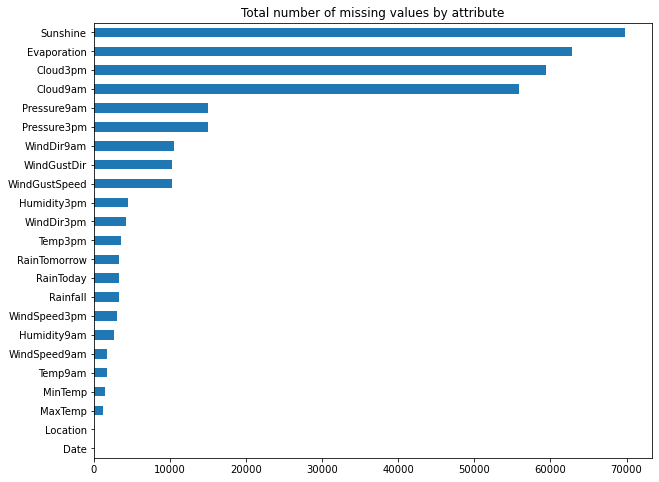

In [19]:
missing = df.isnull().sum().sort_values(ascending = True)
missing.plot.barh(figsize = (10,8), title = 'Total number of missing values by attribute');

In [20]:
df['RainToday'].mode()

0    No
dtype: object

In [21]:
df['RainToday'].value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

In [22]:
df['RainToday'] = df['RainToday'].fillna('No')

In [23]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [24]:
df.corr()

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.736555  0.103938     0.466993  0.072586   
MaxTemp        0.736555  1.000000 -0.074992     0.587932  0.470156   
Rainfall       0.103938 -0.074992  1.000000    -0.064351 -0.227549   
Evaporation    0.466993  0.587932 -0.064351     1.000000  0.365602   
Sunshine       0.072586  0.470156 -0.227549     0.365602  1.000000   
WindGustSpeed  0.177415  0.067615  0.133659     0.203021 -0.034750   
WindSpeed9am   0.175064  0.014450  0.087338     0.193084  0.005499   
WindSpeed3pm   0.175173  0.050300  0.057887     0.129400  0.053834   
Humidity9am   -0.232899 -0.504110  0.224405    -0.504092 -0.490819   
Humidity3pm    0.006089 -0.508855  0.255755    -0.390243 -0.629130   
Pressure9am   -0.450970 -0.332061 -0.168154    -0.270362  0.041970   
Pressure3pm   -0.461292 -0.427167 -0.126534    -0.293581 -0.019719   
Cloud9am       0.078754 -0.289370  0.198528    -0.183793 -0.675323   
Cloud3pm       0.021605 -0.277921  0.172403    -0.182618 -0.703930   
Temp9am        0.901821  0.887210  0.011192     0.545115  0.291188   
Temp3pm        0.708906  0.984503 -0.079657     0.572893  0.490501   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp             0.177415      0.175064      0.175173    -0.232899   
MaxTemp             0.067615      0.014450      0.050300    -0.504110   
Rainfall            0.133659      0.087338      0.057887     0.224405   
Evaporation         0.203021      0.193084      0.129400    -0.504092   
Sunshine           -0.034750      0.005499      0.053834    -0.490819   
WindGustSpeed       1.000000      0.605303      0.686307    -0.215070   
WindSpeed9am        0.605303      1.000000      0.519547    -0.270858   
WindSpeed3pm        0.686307      0.519547      1.000000    -0.145525   
Humidity9am        -0.215070     -0.270858     -0.145525     1.000000   
Humidity3pm        -0.026327     -0.031614      0.016432     0.666949   
Pressure9am        -0.458744     -0.228743     -0.296351     0.139442   
Pressure3pm        -0.413749     -0.175817     -0.255439     0.186858   
Cloud9am            0.071736      0.025112      0.053337     0.452297   
Cloud3pm            0.109168      0.054639      0.025396     0.357326   
Temp9am             0.150150      0.128545      0.163030    -0.471354   
Temp3pm             0.032748      0.004569      0.027778    -0.498399   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp           0.006089    -0.450970    -0.461292  0.078754  0.021605   
MaxTemp          -0.508855    -0.332061    -0.427167 -0.289370 -0.277921   
Rainfall          0.255755    -0.168154    -0.126534  0.198528  0.172403   
Evaporation      -0.390243    -0.270362    -0.293581 -0.183793 -0.182618   
Sunshine         -0.629130     0.041970    -0.019719 -0.675323 -0.703930   
WindGustSpeed    -0.026327    -0.458744    -0.413749  0.071736  0.109168   
WindSpeed9am     -0.031614    -0.228743    -0.175817  0.025112  0.054639   
WindSpeed3pm      0.016432    -0.296351    -0.255439  0.053337  0.025396   
Humidity9am       0.666949     0.139442     0.186858  0.452297  0.357326   
Humidity3pm       1.000000    -0.027544     0.051997  0.517120  0.523120   
Pressure9am      -0.027544     1.000000     0.961326 -0.129796 -0.147861   
Pressure3pm       0.051997     0.961326     1.000000 -0.060772 -0.084778   
Cloud9am          0.517120    -0.129796    -0.060772  1.000000  0.603564   
Cloud3pm          0.523120    -0.147861    -0.084778  0.603564  1.000000   
Temp9am          -0.221019    -0.422556    -0.470187 -0.136959 -0.126659   
Temp3pm          -0.557841    -0.286770    -0.389548 -0.302060 -0.317420   

                Temp9am   Temp3pm  
MinTemp        0.901821  0.708906  
MaxTemp        0.887210  0.984503  
Rainfall       0.011192 -0.079657  
Evaporation    0.545115  0.572893  
Sunshine       0.291188  0.490501  
WindGustSpeed  0.150150  0.032748  
WindSpeed9am   0.128545  0.004569  
Wi

In [26]:
temp = df[['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']]
temp.corr()

MinTemp   MaxTemp   Temp9am   Temp3pm
MinTemp  1.000000  0.736555  0.901821  0.708906
MaxTemp  0.736555  1.000000  0.887210  0.984503
Temp9am  0.901821  0.887210  1.000000  0.860591
Temp3pm  0.708906  0.984503  0.860591  1.000000

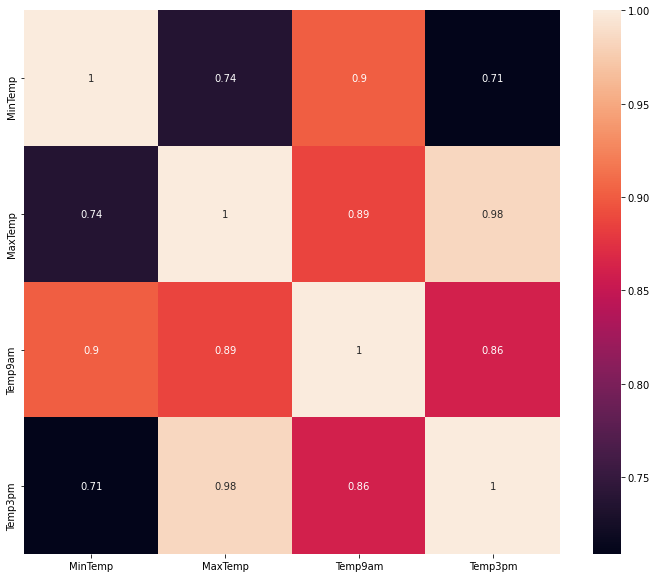

In [29]:
plt.figure(figsize = (12,10))
sns.heatmap(temp.corr(), annot = True, cbar = True);

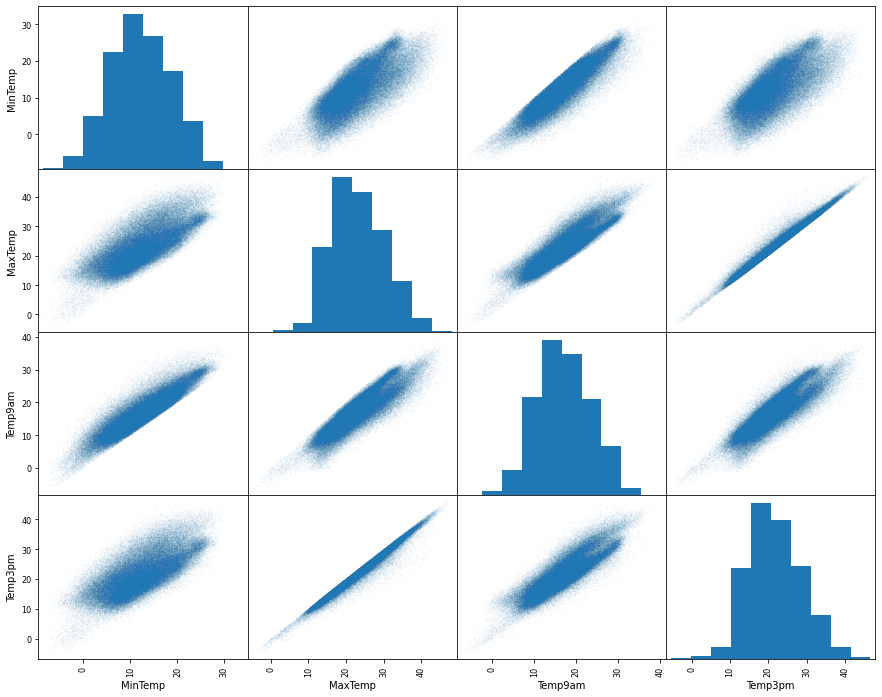

In [30]:
from pandas.plotting import scatter_matrix
scatter_matrix(temp, figsize = (15,12), alpha = 0.05, s=5);

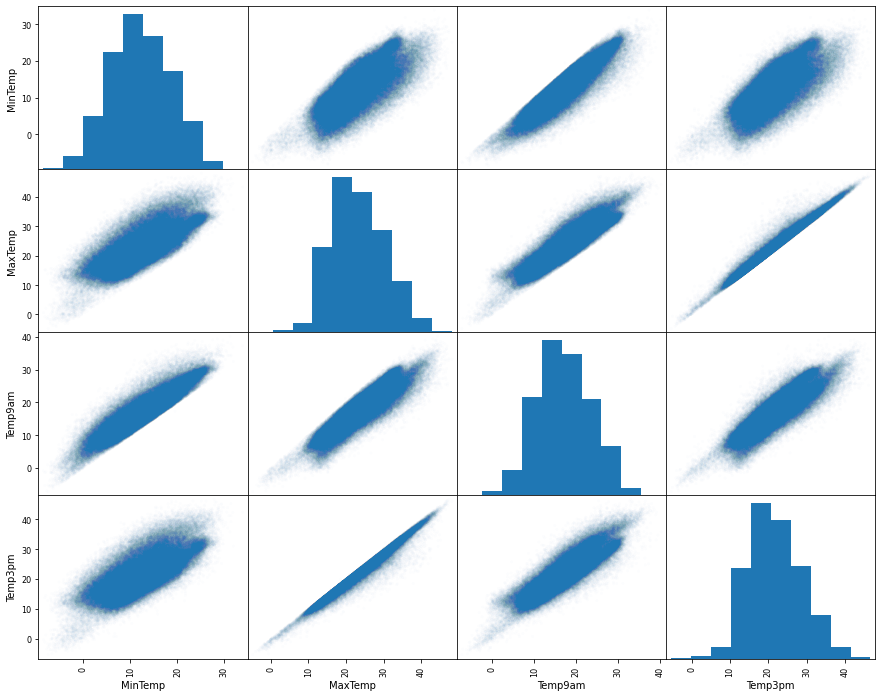

In [31]:
scatter_matrix(temp, figsize = (15,12), alpha = 0.01);

In [32]:
winspeed = df[['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']]
winspeed.corr()

WindGustSpeed  WindSpeed9am  WindSpeed3pm
WindGustSpeed       1.000000      0.605303      0.686307
WindSpeed9am        0.605303      1.000000      0.519547
WindSpeed3pm        0.686307      0.519547      1.000000

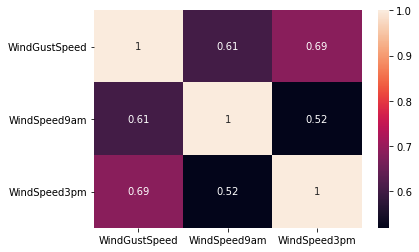

In [35]:
sns.heatmap(winspeed.corr(), annot = True, cbar = True);

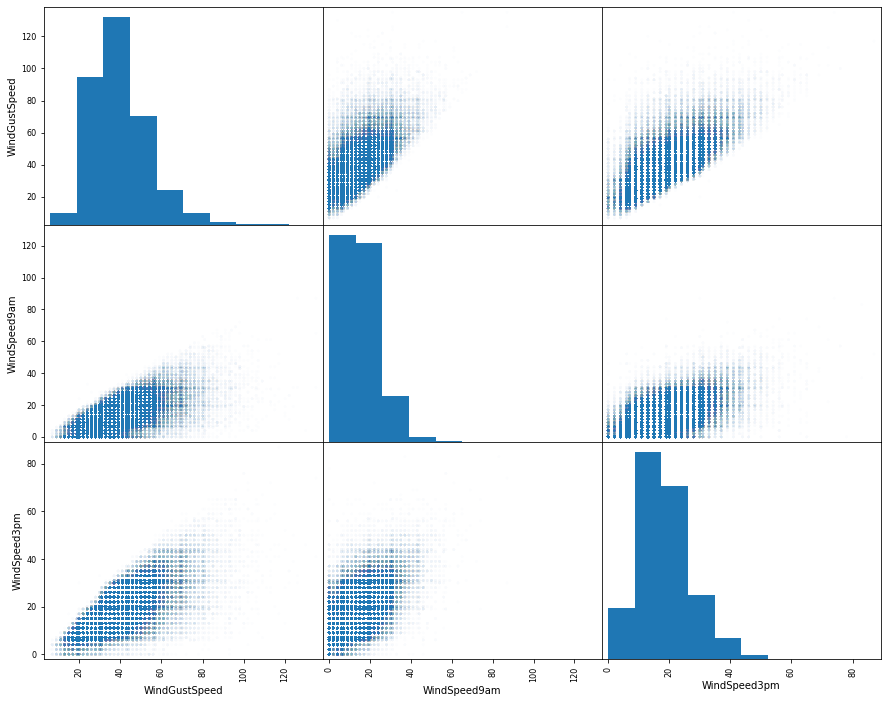

In [37]:
scatter_matrix(winspeed, figsize = (15,12), alpha = 0.01);

In [38]:
humid = df[['Humidity9am', 'Humidity3pm']]
humid.corr()

Humidity9am  Humidity3pm
Humidity9am     1.000000     0.666949
Humidity3pm     0.666949     1.000000

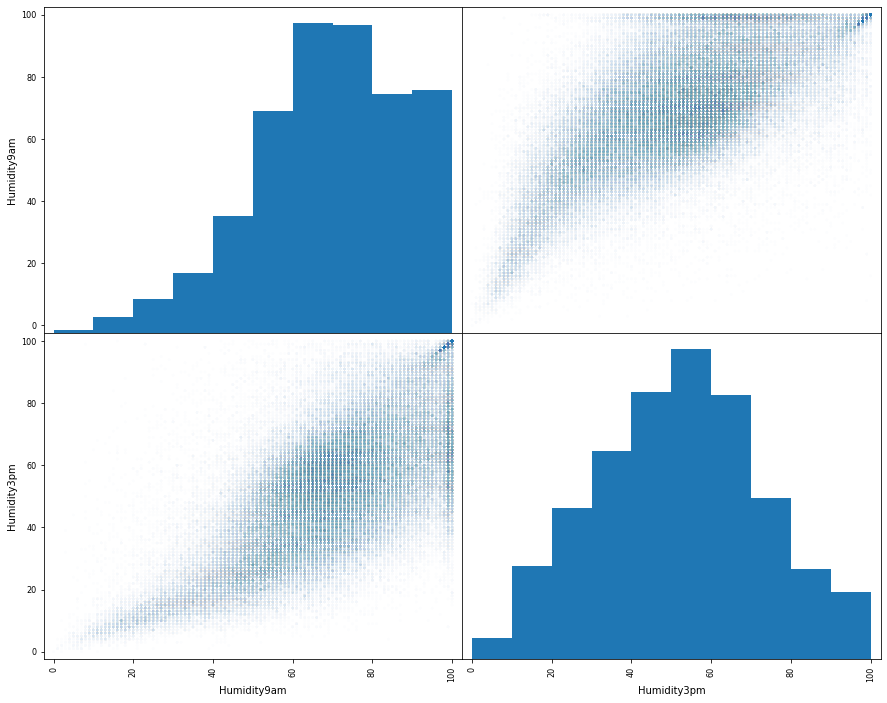

In [39]:
scatter_matrix(humid, figsize = (15,12), alpha = 0.01);

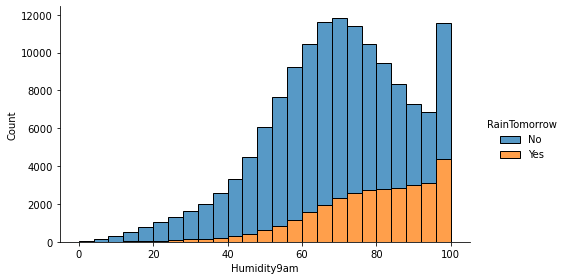

In [41]:
sns.displot(data = df, kind = 'hist', x = 'Humidity9am', hue = 'RainTomorrow', multiple = 'stack', bins = 25,
           height = 4, aspect = 1.7);

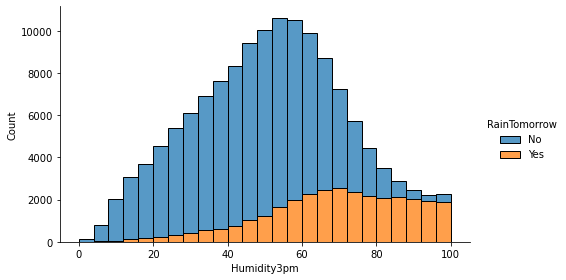

In [42]:
sns.displot(data = df, kind = 'hist', x = 'Humidity3pm', hue = 'RainTomorrow', multiple = 'stack', bins = 25,
           height = 4, aspect = 1.7);

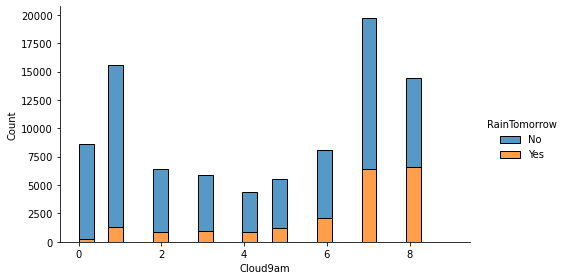

In [43]:
sns.displot(data = df, kind = 'hist', x = 'Cloud9am', hue = 'RainTomorrow', multiple = 'stack', bins = 25,
           height = 4, aspect = 1.7);

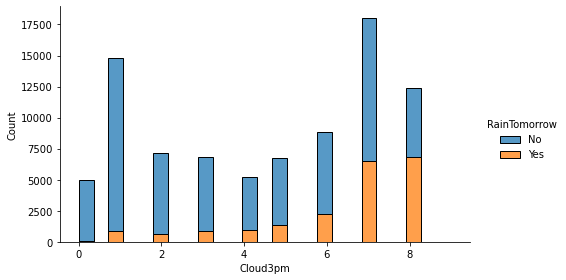

In [44]:
sns.displot(data = df, kind = 'hist', x = 'Cloud3pm', hue = 'RainTomorrow', multiple = 'stack', bins = 25,
           height = 4, aspect = 1.7);

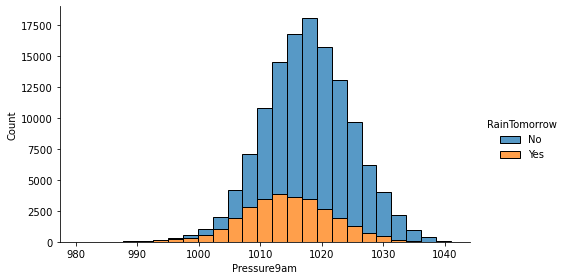

In [45]:
sns.displot(data = df, kind = 'hist', x = 'Pressure9am', hue = 'RainTomorrow', multiple = 'stack', bins = 25,
           height = 4, aspect = 1.7);

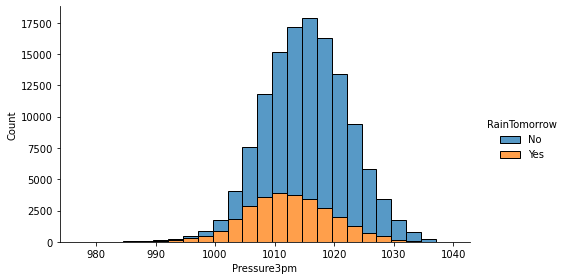

In [46]:
sns.displot(data = df, kind = 'hist', x = 'Pressure3pm', hue = 'RainTomorrow', multiple = 'stack', bins = 25,
           height = 4, aspect = 1.7);

In [47]:
df = df.drop(columns = ['Evaporation', 'Sunshine', 'Cloud3pm', 'Cloud9am', 'Date', 'Location'], axis = 1)

In [48]:
df = df.dropna(how = 'any')
df.shape

(112925, 17)

In [49]:
df['RainToday'].replace({'No': 0, 'Yes': 1}, inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace = True)

cat_c = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
dfinal = pd.get_dummies(df, columns = cat_c)
print(dfinal.shape)
dfinal.head()

(112925, 62)


MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0     13.4     22.9       0.6           44.0          20.0          24.0   
1      7.4     25.1       0.0           44.0           4.0          22.0   
2     12.9     25.7       0.0           46.0          19.0          26.0   
3      9.2     28.0       0.0           24.0          11.0           9.0   
4     17.5     32.3       1.0           41.0           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  ...  WindDir9am_NNW  \
0         71.0         22.0       1007.7       1007.1  ...               0   
1         44.0         25.0       1010.6       1007.8  ...               1   
2         38.0         30.0       1007.6       1008.7  ...               0   
3         45.0         16.0       1017.6       1012.8  ...               0   
4         82.0         33.0       1010.8       1006.0  ...               0   

   WindDir9am_NW  WindDir9am_S  WindDir9am_SE  WindDir9am_SSE  WindDir9am_SSW  \
0              0             0              0               0               0   
1              0             0              0               0               0   
2              0             0              0               0               0   
3              0             0              1               0               0   
4              0             0              0               0               0   

   WindDir9am_SW  WindDir9am_W  WindDir9am_WNW  WindDir9am_WSW  
0              0             1               0               0  
1              0             0               0               0  
2              0             1               0               0  
3              0             0               0               0  
4              0             0               0               0  

[5 rows x 62 columns]

In [51]:
from sklearn import preprocessing
standa = preprocessing.MinMaxScaler()
standa.fit(dfinal)
dfinal = pd.DataFrame(standa.transform(dfinal), index = dfinal.index, columns = dfinal.columns)
dfinal.head()

MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0  0.513064  0.446154  0.001632       0.289062      0.211765      0.258824   
1  0.370546  0.494505  0.000000       0.289062      0.023529      0.235294   
2  0.501188  0.507692  0.000000       0.304688      0.200000      0.282353   
3  0.413302  0.558242  0.000000       0.132812      0.105882      0.082353   
4  0.610451  0.652747  0.002720       0.265625      0.058824      0.211765   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  ...  WindDir9am_NNW  \
0         0.71         0.22     0.449587       0.4800  ...             0.0   
1         0.44         0.25     0.497521       0.4912  ...             1.0   
2         0.38         0.30     0.447934       0.5056  ...             0.0   
3         0.45         0.16     0.613223       0.5712  ...             0.0   
4         0.82         0.33     0.500826       0.4624  ...             0.0   

   WindDir9am_NW  WindDir9am_S  WindDir9am_SE  WindDir9am_SSE  WindDir9am_SSW  \
0            0.0           0.0            0.0             0.0             0.0   
1            0.0           0.0            0.0             0.0             0.0   
2            0.0           0.0            0.0             0.0             0.0   
3            0.0           0.0            1.0             0.0             0.0   
4            0.0           0.0            0.0             0.0             0.0   

   WindDir9am_SW  WindDir9am_W  WindDir9am_WNW  WindDir9am_WSW  
0            0.0           1.0             0.0             0.0  
1            0.0           0.0             0.0             0.0  
2            0.0           1.0             0.0             0.0  
3            0.0           0.0             0.0             0.0  
4            0.0           0.0             0.0             0.0  

[5 rows x 62 columns]

In [53]:
# dfinal.hist(figsize = (20,15));

In [55]:
corr = dfinal.corr()
corr1 = pd.DataFrame(abs(corr['RainTomorrow']), columns = ['RainTomorrow'])
nonvals = corr1.loc[corr1['RainTomorrow'] < 0.005]
print("Var correlation < 0.5%", nonvals)
nonvals = list(nonvals.index.values)

Var correlation < 0.5%                  RainTomorrow
WindGustDir_S        0.001759
WindGustDir_SSW      0.003007
WindDir3pm_SSW       0.003230
WindDir3pm_WSW       0.002857
WindDir9am_SW        0.004053


In [56]:
dfinal1 = dfinal.drop(columns = nonvals, axis = 1)
print("Data Final", dfinal1.shape)

Data Final (112925, 57)


## Training and Testing

In [58]:
Y = dfinal1['RainTomorrow']
X = dfinal1.drop(columns = ['RainTomorrow'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=9)

In [59]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', y_test.shape)

X train shape:  (90340, 56)
Y train shape:  (90340,)
X test shape:  (22585, 56)
Y test shape:  (22585,)


In [60]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

In [61]:
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

LGBMClassifier()

In [62]:
predict_train = model.predict(X_train)
print("\nTarget on train data", predict_train)


Target on train data [0. 0. 0. ... 0. 0. 1.]


In [63]:
accuracy_train = accuracy_score(y_train, predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)
predict_test = model.predict(X_test)
print('\nTarget on test data', predict_test)


accuracy_score on train dataset :  0.8666482178437016

Target on test data [1. 0. 0. ... 0. 0. 1.]


In [64]:
accuracy_test = accuracy_score(y_test, predict_test)
print("\naccuracy score on test dataset : ", accuracy_test)


accuracy score on test dataset :  0.8561434580473766


# ML Interprit time

In [75]:
!pip install lime
import lime
import lime.lime_tabular

Processing c:\users\savil\appdata\local\pip\cache\wheels\e6\a6\20\cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546\lime-0.2.0.1-py3-none-any.whl


In [76]:
Y.unique()

array([0., 1.])

In [80]:
class_names = ['Yes', 'No']

In [77]:
dfinal.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N',
       'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
       'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
       'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW',
       'WindGustDir_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE',
       'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW',
       'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE',
       'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW',
       'WindDir3pm_WSW', 'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE',
       'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW',
       'WindDir9am_NW', 'W

In [78]:
feature_names = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N',
       'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
       'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
       'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW',
       'WindGustDir_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE',
       'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW',
       'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE',
       'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW',
       'WindDir3pm_WSW', 'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE',
       'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW',
       'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE',
       'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW',
       'WindDir9am_WSW']

In [81]:
explainer1 = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names = feature_names, class_names = class_names,
                                                   discretize_continuous = True)

In [82]:
X_test.iloc[0]

MinTemp            0.589074
MaxTemp            0.531868
Rainfall           0.000000
WindGustSpeed      0.351562
WindSpeed9am       0.129412
WindSpeed3pm       0.258824
Humidity9am        0.720000
Humidity3pm        0.920000
Pressure9am        0.656198
Pressure3pm        0.681600
Temp9am            0.586605
Temp3pm            0.422222
RainToday          0.000000
WindGustDir_E      0.000000
WindGustDir_ENE    0.000000
WindGustDir_ESE    0.000000
WindGustDir_N      0.000000
WindGustDir_NE     0.000000
WindGustDir_NNE    0.000000
WindGustDir_NNW    0.000000
WindGustDir_NW     0.000000
WindGustDir_SE     0.000000
WindGustDir_SSE    0.000000
WindGustDir_SW     0.000000
WindGustDir_W      0.000000
WindGustDir_WNW    0.000000
WindGustDir_WSW    0.000000
WindDir3pm_E       0.000000
WindDir3pm_ENE     0.000000
WindDir3pm_ESE     0.000000
WindDir3pm_N       0.000000
WindDir3pm_NE      0.000000
WindDir3pm_NNE     0.000000
WindDir3pm_NNW     0.000000
WindDir3pm_NW      0.000000
WindDir3pm_S       0

In [83]:
exp1 = explainer1.explain_instance(X_test.iloc[0], model.predict_proba, num_features = 8, top_labels = 1)

In [84]:
exp1.show_in_notebook(show_table = True, show_all = False)

In [87]:
exp2 = explainer1.explain_instance(X_test.iloc[1], model.predict_proba, num_features = 8, top_labels = 1)

In [88]:
exp2.show_in_notebook(show_table = True, show_all = False)